## Matrix Multiplication

Let $A = \begin{bmatrix} a \ b \end{bmatrix}$, where $a = \begin{bmatrix} 1 & 2 \end{bmatrix}$ and $b = \begin{bmatrix} 3 & 4 \end{bmatrix}$

And $B = \begin{bmatrix} c & d \end{bmatrix}$, where $c = \begin{bmatrix} 5 \ 6 \end{bmatrix}$ and $d = \begin{bmatrix} 7 \ 8 \end{bmatrix}$

To find the product $AB$, we'll need to calculate the dot product of each row of $A$ with each column of $B$.

$AB = \begin{bmatrix} a \cdot c & a \cdot d \ b \cdot c & b \cdot d \end{bmatrix} = \begin{bmatrix} (1 \cdot 5) + (2 \cdot 6) & (1 \cdot 7) + (2 \cdot 8) \ (3 \cdot 5) + (4 \cdot 6) & (3 \cdot 7) + (4 \cdot 8) \end{bmatrix} = \begin{bmatrix} 17 & 20 \ 39 & 46 \end{bmatrix}$

So the resulting matrix $AB$ is:

$AB = \begin{bmatrix} 17 & 20 \ 39 & 46 \end{bmatrix}$

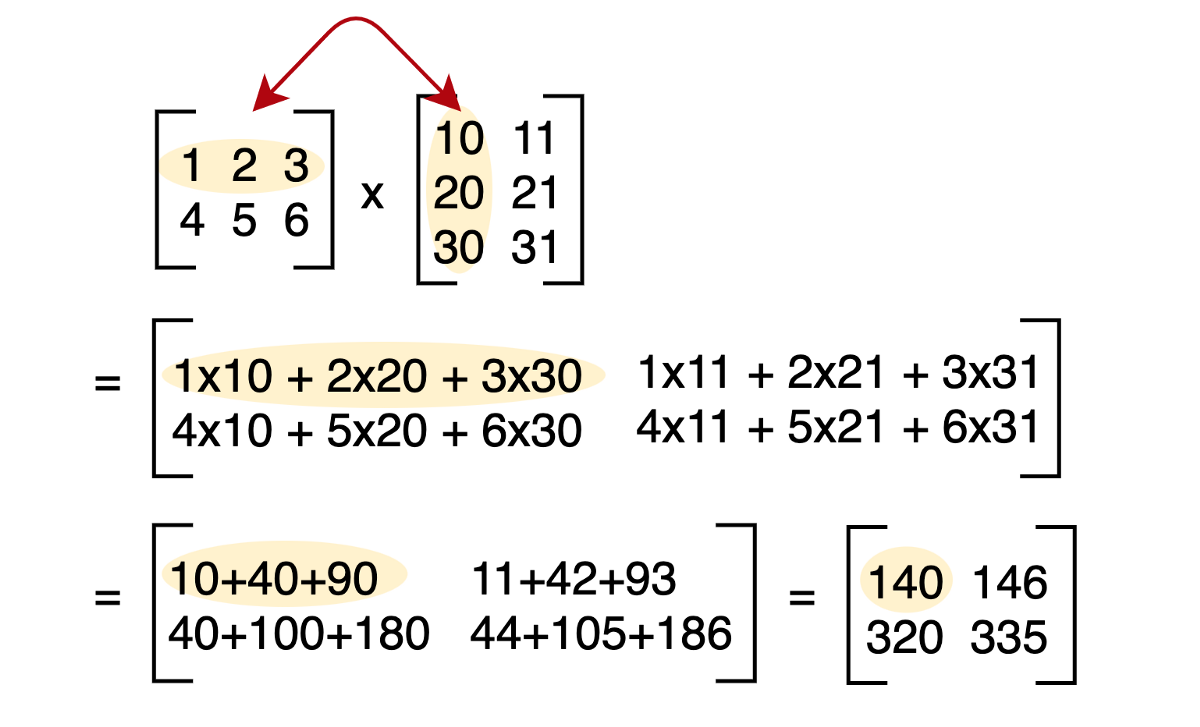

In [7]:
from IPython import display
#display.Image("/Users/katherinemead/ANLY-512/HW-1/Matrix Multiplication.png")

# make image smaller
display.Image("Matrix Multiplication.png", width=400, height=400)

## Matrix Addition

Let $A = \begin{bmatrix} a_{11} & a_{12} \ a_{21} & a_{22} \end{bmatrix}$ and $B = \begin{bmatrix} b_{11} & b_{12} \ b_{21} & b_{22} \end{bmatrix}$ be two matrices with the same dimensions (2 x 2 in this case). The matrix sum $A + B$ is given by:

$A + B = \begin{bmatrix} a_{11} + b_{11} & a_{12} + b_{12} \ a_{21} + b_{21} & a_{22} + b_{22} \end{bmatrix}$

So, for the example matrices above, $A + B = \begin{bmatrix} a_{11} + b_{11} & a_{12} + b_{12} \ a_{21} + b_{21} & a_{22} + b_{22} \end{bmatrix} = \begin{bmatrix} 2 & 3 \ 5 & 6 \end{bmatrix}$.

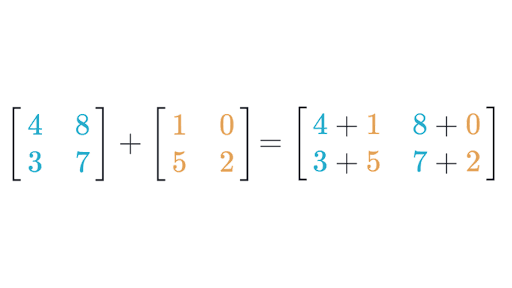

In [8]:
from IPython import display

# make image smaller
display.Image("Matrix addition.png", width=400, height=400)

## Function to Multiply Matrices:

In [9]:
def multiply_matrices(matrix1, matrix2):
    # check that the number of columns in the first matrix is equal to the number of rows in the second matrix
    if len(matrix1[0]) != len(matrix2):
        print("The number of columns in the first matrix must be equal to the number of rows in the second matrix.")
        return
    # create a new matrix to hold the result
    result = []
    # iterate through the rows of the first matrix
    for i in range(len(matrix1)):
        # create a new row to hold the result
        result.append([])
        # iterate through the columns of the second matrix
        for j in range(len(matrix2[0])):
            # iterate through the columns of the first matrix
            total = 0
            for k in range(len(matrix1[0])):
                # add the product of the corresponding elements of the two matrices
                total += matrix1[i][k] * matrix2[k][j]
            # append the total to the result row
            result[i].append(total)

## Function to Add Matrices:

In [11]:
def add_matrices(matrix1, matrix2):
    # check that the dimensions of the two matrices are equal
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        print("The dimensions of the two matrices must be equal.")
        return
    # create a new matrix to hold the result
    result = []
    # iterate through the rows of the first matrix
    for i in range(len(matrix1)):
        # create a new row to hold the result
        result.append([])
        # iterate through the columns of the first matrix
        for j in range(len(matrix1[0])):
            # add the corresponding elements of the two matrices
            result[i].append(matrix1[i][j] + matrix2[i][j])
    return result

In [14]:
# create a 2x2 matrix

matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

# multiply the matrices
print(multiply_matrices(matrix1, matrix2))
# 1 * 5 + 2 * 7 = 19
# 1 * 6 + 2 * 8 = 22
# 3 * 5 + 4 * 7 = 43
# 3 * 6 + 4 * 8 = 50

# add the matrices
print(add_matrices(matrix1, matrix2))

None
17
20
[[6, 8], [10, 12]]


In [62]:
class Matrix:
    # Constructor method to initialize the matrix data and shape
    def __init__(self, data):
        # Store the matrix data
        self.data = data
        # Calculate and store the shape of the matrix (number of rows, number of columns)
        self.shape = (len(data), len(data[0]))

    # Method to represent the matrix as a string (e.g. when using `print`)
    def __repr__(self):
        # Return the string representation of the matrix data
        return str(self.data)

    # Magic method to handle matrix multiplication (using the `*` operator)
    def __mul__(self, other):
        # Check if the other operand is also a matrix
        if isinstance(other, Matrix):
            # Check if the shapes of the matrices are compatible for multiplication
            if self.shape[1] != other.shape[0]:
                # Raise an error if the shapes are incompatible
                raise ValueError("Cannot multiply matrices, shapes don't match")

            # Initialize the result matrix
            result = []
            s = 0
            # Loop through the rows of the first matrix
            for i in range(self.shape[0]):
                # Initialize a row of the result matrix
                row = []
                # Loop through the columns of the second matrix
                for j in range(other.shape[1]):
                    # Initialize the dot product for this cell
                    # Loop through the entries in the dot product
                    for k in range(self.shape[1]):
                        # Update the dot product with the product of the corresponding entries
                        s += self.data[i][k] * other.data[k][j]
                    # Add the dot product to the current row
                    row.append(s)
                    print("The row looks like this: ", row)
                # Add the row to the result matrix
                result.append(row)
                print("The result looks like this: ", result)
            # Return the result matrix
            return Matrix(result)
        else:
            # Raise an error if the other operand is not a matrix
            raise ValueError("Cannot multiply, incompatible types")
        
    # Magic method to handle matrix addition (using the `+` operator)
    def __add__(self, other):
        # Check if the other operand is also a matrix
        if isinstance(other, Matrix):
            # Check if the shapes of the matrices are compatible for addition
            if self.shape != other.shape:
                # Raise an error if the shapes are incompatible
                raise ValueError("Cannot add matrices, shapes don't match")

            # Initialize the result matrix
            result1 = []
            # Loop through the rows of the first matrix
            for i in range(self.shape[0]):
                # Initialize a row of the result matrix
                row = []
                # Loop through the columns of the second matrix
                for j in range(self.shape[1]):
                    # Add the corresponding entries of the two matrices
                    row.append(self.data[i][j] + other.data[i][j])
                # Add the row to the result matrix
                result1.append(row)
            # Return the result matrix
            return Matrix(result1)
        else:
            # Raise an error if the other operand is not a matrix
            raise ValueError("Cannot add, incompatible types")

v1 = Matrix([[1], [2], [3]])
v2 = Matrix([[4, 5, 6]])
v3 = Matrix([[1, 2, 3]])
print(v1 * v2)
#print(v3 + v2)

The row looks like this:  [4]
The row looks like this:  [4, 9]
The row looks like this:  [4, 9, 15]
The result looks like this:  [[4, 9, 15]]
The row looks like this:  [23]
The row looks like this:  [23, 33]
The row looks like this:  [23, 33, 45]
The result looks like this:  [[4, 9, 15], [23, 33, 45]]
The row looks like this:  [57]
The row looks like this:  [57, 72]
The row looks like this:  [57, 72, 90]
The result looks like this:  [[4, 9, 15], [23, 33, 45], [57, 72, 90]]
[[4, 9, 15], [23, 33, 45], [57, 72, 90]]


## Module 2: Discussion OOP

The discussions will help you to prepare for the quizzes each Module.

For all discussions:

1. Post your initial response during the first week of the 2-week module.
2. Post two SUBSTANTIVE peer responses by the end of week 2. Provide feedback, suggestions, and/or tips.

Discussion.

Implement a Matrix class that allows for matrix addition and multiplication. Make reasonable and appropriate design decisions and justify them in comments or in the discussion board. (If addition and multiplication are undefined, then throw an exception.)
You will implement operator overloading so that the '+' and '*' symbols can be used. 
Implement a Vector class that inherets from the Matrix class. It will inheret addition and multiplication (inner product) but will also have a multiplication method for an outer product (choose an intuitive symbol). (If addition and multiplication are undefined due to size mismatch, then throw an exception.)

Constraints.

You may not import any libraries. 

In [95]:
class Matrix:
    def __init__(self, data): 
        """This method is the constructor method to initialize the matrix data and shape"""
        self.data = data
        self.shape = (len(data), len(data[0]))

    def __repr__(self): # Return the string representation of the matrix data
        """This method returns a string representation of the matrix data."""
        return str(self.data) # Method to represent the matrix as a string (e.g. when using `print`)

    def __mul__(self, other): # INNER PRODUCT MULTIPLICATION METHOD
        """This method overloads the multiplication operator (*) for matrix multiplication. It takes in another matrix as an argument and returns the inner product of the two matrices."""
        if isinstance(other, Matrix): # Check if the other operand is also a matrix
            if self.shape[1] != other.shape[0]: # Check if the shapes of the matrices are compatible for multiplication
                raise ValueError("Cannot multiply matrices, shapes don't match") # Raise an error if the shapes are incompatible
            
            columns_of_other = other.shape[1] # get the number of columns in the other matrix (does NOT have to match up with the number of rows in the self matrix)
            rows_of_self = self.shape[0] # get the number of rows in the self matrix (does NOT have to match up with the number of columns in the other matrix)
            matching_number = self.shape[1] # could also be other.shape[0]; these quantities need to be equal for the matrix multiplication to work
            
            result = [] # initialize the result matrix
            for col in range(columns_of_other): # loop through the columns of the other matrix
                rows = [] # initialize a row of the result matrix
                for row in range(rows_of_self): # loop through the rows of the self matrix
                    s = 0 # initialize the product for this row
                    for num in range(matching_number): # loop through the indices of the row of self and the column of other
                        s += self.data[row][num] * other.data[num][col]
                    rows.append(s) # add the product to the current row
                result.append(rows) # add the row to the result matrix
            return Matrix(result) # return the result matrix
        else:
            raise ValueError("Cannot multiply, incompatible types") # Raise an error if the other operand is not a matrix
    
    # MATRIX ADDITION
    def __add__(self, other):
        """This method overloads the addition operator (+) for matrix addition. It takes in another matrix as an argument and returns the sum of the two matrices."""
        if isinstance(other, Matrix): # Check if the other operand is also a matrix
            """Checks if the shapes of the matrices are compatible for addition"""
            if self.shape != other.shape: # Check if the shapes of the matrices are compatible for addition
                raise ValueError("Cannot multiply matrices, shapes don't match") # Raise an error if the shapes are incompatible

            result = [] # Initialize the result matrix
            for i in range(self.shape[0]): # Loop through the rows of the first matrix
                temp_row = [] # Initialize a row of the result matrix
                for j in range(self.shape[1]): # Loop through the columns of the second matrix
                    temp_row.append(self.data[i][j] + other.data[i][j]) # Add the corresponding entries of the two matrices
                result.append(temp_row) # add the row to the result matrix
            return Matrix(result) # Return the result matrix
        else:
            raise ValueError("Cannot multiply, incompatible types") # Raise an error if the other operand is not a matrix
        
class Vector(Matrix):
    def __init__(self, data):
        """This method is the constructor method to initialize the vector data and shape"""
        super().__init__(data) # Call the constructor method of the parent class (Matrix)

    def __repr__(self): # Return the string representation of the vector data
        """This method returns a string representation of the vector data."""
        return str(self.data[0]) # Method to represent the vector as a string (e.g. when using `print`)

    # INNER PRODUCT MULTIPLICATION METHOD
    def __mul__(self, other): 
        """This method overloads the multiplication operator (*) for vector multiplication. It takes in another vector as an argument and returns the inner product of the two vectors."""
        if isinstance(other, Vector): # Check if the other operand is also a vector
            if self.shape[0] != other.shape[0]: # Check if the shapes of the vectors are compatible for multiplication
                raise ValueError("Cannot multiply vectors, shapes don't match") # Raise an error if the shapes are incompatible
            result = 0 # initialize the result vector
            for i in range(self.shape[0]): # loop through the entries of the vectors
                result += self.data[i] * other.data[i]
            return Vector(result)
        else:
            raise ValueError("Cannot multiply, incompatible types")
        
    # OUTER PRODUCT MULTIPLICATION METHOD
    def __matmul__(self, other):
        """This method overloads the @ operator for vector multiplication. It takes in another vector as an argument and returns the outer product of the two vectors."""
        if isinstance(other, Vector): # Check if the other operand is also a vector
            result = [] # initialize the result vector
            for i in range(self.shape[0]): # loop through the entries of the first vector
                temp_row = [] # initialize a row of the result matrix
                for j in range(other.shape[0]): # loop through the entries of the second vector
                    temp_row.append(self.data[i] * other.data[j]) # multiply the corresponding entries of the two vectors
                result.append(temp_row) # add the row to the result matrix
            return Vector(result) # return the result matrix
        else:
            raise ValueError("Cannot multiply, incompatible types")
    
    # VECTOR ADDITION
    def __add__(self, other):
        """This method overloads the addition operator (+) for vector addition. It takes in another vector as an argument and returns the sum of the two vectors."""
        if isinstance(other, Vector): # Check if the other operand is also a vector
            # Check if the shapes of the vectors are compatible for addition
            if self.shape != other.shape:
                raise ValueError("Cannot multiply vectors, shapes don't match")

            result = [] # Initialize the result vector
            for i in range(self.shape[0]): # Loop through the entries of the first vector
                result.append(self.data[i] + other.data[i]) # Add the corresponding entries of the two vectors
            return result # Return the result vector
        else:
            raise ValueError("Cannot multiply, incompatible types") # Raise an error if the other operand is not a vector

v1 = Matrix([1, 2, 3])
v2 = Matrix([[4], [5], [6]])
v3 = Matrix([[1, 2, 3], [4, 5, 6]])
v4 = Matrix([[1, 2, 3], [4, 5, 6]])
print(v1 @ v1)


TypeError: object of type 'int' has no len()

In [12]:
test = [[1, 2, 3]]

for i in test:
    for k in i:
        print(k)

1
2
3


In [ ]:
    # DONT KNOW WHY THIS ISNT WORKING AND IM SAD: INNER PRODUCT MULTIPLICATION
    def __mul__(self, other):
        # Check if the other operand is also a matrix
        if isinstance(other, Matrix):
            # Check if the shapes of the matrices are compatible for multiplication
            if self.shape[1] != other.shape[0]:
                # Raise an error if the shapes are incompatible
                raise ValueError("Cannot multiply matrices, shapes don't match")
            
            columns_of_other = other.shape[1]
            print("The columns of other is: ", columns_of_other)
            rows_of_self = self.shape[0]
            print("The rows of self is: ", rows_of_self)
            matching_number = self.shape[1] # could also be other.shape[0]; these quantities need to be equal for the matrix multiplication to work
            print("The matching number is: ", matching_number)
            
            result = []
            s = 0
            for col in range(columns_of_other - 1): 
                print("The range for columns of other is: ", range(columns_of_other - 1))
                print("The column of other is: ", col)
                for row in range(rows_of_self - 1):
                    print("the range for rows of self is: ", range(rows_of_self - 1))
                    print("The row is: ", row)
                    for num in range(matching_number - 1):
                        print("The range for num is: ", range(matching_number - 1))
                        print("the num is: ", num)
                        s += self.data[row][num] * other.data[num][col]
                        print("The s is: ", s)
            result.append(s)

            return result